# Dinamic stochastic models in Python

## Forecasting non-observables

1. Load libraries

In [1]:
import sys
sys.path.append('Libraries')
import DSGE_LinearMethods as DLM
import DSGE_PreProcessing as DPP
import HandleTimeSeries as HTS
import sympy as sp
sp.init_session(use_latex=True)

IPython console for SymPy 1.11.1 (Python 3.11.5-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



* Check Libraries below are actually needed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1. Procesing and solving the model

In [3]:
Mod = DPP.process_file3('SimpleSE4.txt')
Mod = DLM.SolveModel(Mod, "Cal.txt", True)


-> Stability conditions met

Steady state
           User supplied  Numerical
y               0.000000   0.000000
Ds              0.000000   0.000000
Dp              1.980263   1.980263
Dpm             1.980263   1.980263
ys              0.000000   0.000000
Dps             1.980263   1.980263
Ey              0.000000   0.000000
Ey(-3)          0.000000   0.000000
Ey(-2)          0.000000   0.000000
Ey(-1)          0.000000   0.000000
q               0.000000   0.000000
EDp             1.980263   1.980263
EDs             0.000000   0.000000
i               3.469124   3.469124
resAR_y         0.000000   0.000000
resAR_Dp        0.000000   0.000000
resAR_i         0.000000   0.000000
resAR_x         0.000000   0.000000
Eys             0.000000   0.000000
EDps            1.980263   1.980263
iis             2.975296   2.975296
resAR_ys        0.000000   0.000000
resAR_Dps       0.000000   0.000000
resAR_is        0.000000   0.000000
phi             0.000000   0.000000
DQ              0.0000

3. Load data

In [4]:
Describ, DBobs = HTS.ReadDB_excel('Observables.xlsx',sheet='Data')
DBobs

,Ds,Dp,i,DY,Dps,iis,DYs
2005-03-31,0.549732,-0.116627,2.673215,17.039751,2.154706,3.827696,2.986523
2005-06-30,1.453255,1.901589,1.339698,12.337556,1.387131,3.863434,7.547086
2005-09-30,1.060644,2.165559,0.864062,9.961982,0.290263,3.116718,-1.092735
2005-12-31,1.235675,4.865085,1.928785,11.029520,-0.758677,2.897284,0.780268
2006-03-31,5.185191,3.578219,2.106303,0.013869,3.037365,4.216273,7.494221
...,...,...,...,...,...,...,...
2023-12-31,-2.988336,2.428290,4.980557,-3.291829,2.465616,2.274087,10.078954
2024-03-31,-0.778355,4.239042,3.957939,9.450678,4.075272,2.293660,1.617262
2024-06-30,0.499519,5.032115,3.511984,4.364838,4.956834,2.522182,15.446474
2024-09-30,-0.779244,5.517448,3.670457,-7.120992,3.994665,3.462226,2.036789


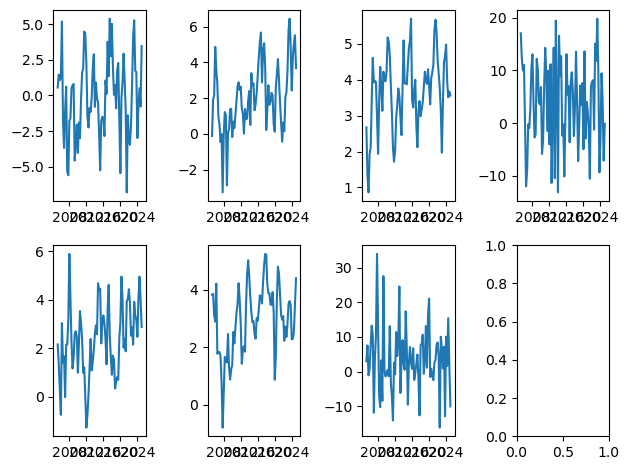

In [5]:
fig, axs = plt.subplots(2,4)
axs[0,0].plot(DBobs.index, DBobs["Ds"], linestyle='-')
axs[0,1].plot(DBobs.index, DBobs["Dp"],  linestyle='-')
axs[0,2].plot(DBobs.index, DBobs["i"],  linestyle='-')
axs[0,3].plot(DBobs.index, DBobs["DY"],  linestyle='-')
axs[1,0].plot(DBobs.index, DBobs["Dps"], linestyle='-')
axs[1,1].plot(DBobs.index, DBobs["iis"], linestyle='-')
axs[1,2].plot(DBobs.index, DBobs["DYs"],  linestyle='-')

plt.tight_layout()
plt.show()

In [6]:
DF_s, DF_u, minuslogL = DLM.KFts(DBobs, Mod, {'diffuse':False})

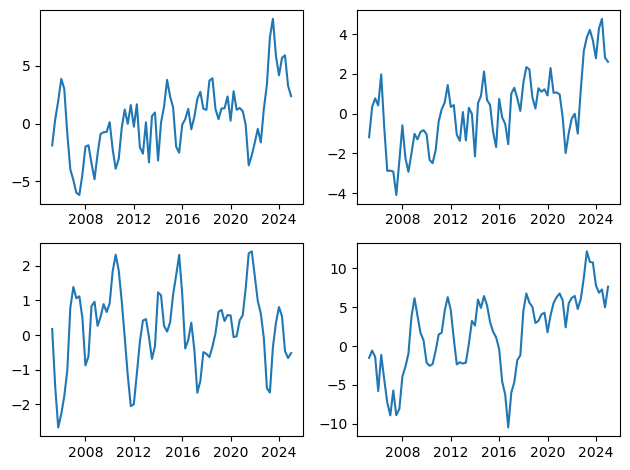

In [7]:
fig, axs = plt.subplots(2,2)
axs[0,0].plot(DF_s.index, DF_s["y"], linestyle='-')   #marker adds circles to points
axs[0,1].plot(DF_s.index, DF_s["Ey"], linestyle='-')  #marker adds circles to points
axs[1,0].plot(DF_s.index, DF_s["phi"], linestyle='-') #marker adds circles to points
axs[1,1].plot(DF_s.index, DF_s["q"], linestyle='-')   #marker adds circles to points
plt.tight_layout()
plt.show()

In [8]:
Data = DF_s
Data

,y,Ds,Dp,Dpm,ys,Dps,Ey,Ey(-3),Ey(-2),Ey(-1),...,resAR_is,phi,DQ,Dp(+3),Dp(+2),Dp(+1),x,DY,phis,DYs
2005-03-31,-1.887492,0.549732,-0.116627,2.153823,-3.105469,2.154706,-1.188209,-2.931642,-3.531069,-3.319485,...,0.673461,0.177070,2.821065,2.059822,1.875553,1.334578,-0.924546,17.039751,1.365015,2.986523
2005-06-30,0.336861,1.453255,1.901589,3.097217,-2.078733,1.387131,0.340309,-3.531069,-3.319485,-1.188209,...,0.637769,-1.484527,0.938796,2.731491,2.840057,2.555916,-1.804735,12.337556,1.354793,7.547086
2005-09-30,1.967321,1.060644,2.165559,2.069461,-3.211952,0.290263,0.768852,-3.319485,-1.188209,0.340309,...,0.262880,-2.663854,-0.814652,2.581951,2.666236,2.536843,-1.725747,9.961982,1.341284,-1.092735
2005-12-31,3.864665,1.235675,4.865085,1.024697,-3.876921,-0.758677,0.413888,-1.188209,0.340309,0.768852,...,0.895607,-2.271973,-4.388088,2.129045,2.628401,3.728822,-0.242773,11.029520,1.528280,0.780268
2006-03-31,3.008097,5.185191,3.578219,4.345867,-2.863401,3.037365,1.974632,0.340309,0.768852,0.413888,...,1.336346,-1.763424,4.644337,2.765847,3.205225,3.852637,0.963233,0.013869,1.746445,7.494221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,4.168932,-2.988336,2.428290,1.449836,-0.160427,2.465616,2.785941,3.840638,4.212983,3.688625,...,-1.361347,0.812159,-2.951009,1.939291,1.933984,1.939756,1.003091,-3.291829,-0.582395,10.078954
2024-03-31,5.671566,-0.778355,4.239042,1.476171,-0.616147,4.075272,4.285761,4.212983,3.688625,2.785941,...,-0.706314,0.542519,-0.942125,2.972777,3.501975,4.305866,1.257477,9.450678,-1.543109,1.617262
2024-06-30,5.902740,0.499519,5.032115,4.221880,2.385436,4.956834,4.772799,3.688625,2.785941,4.285761,...,-1.127546,-0.462722,0.424239,3.248580,3.856586,4.613518,1.328198,4.364838,-2.121530,15.446474
2024-09-30,3.262456,-0.779244,5.517448,3.442183,2.034598,3.994665,2.813418,2.785941,4.285761,4.772799,...,0.249118,-0.658536,-2.302027,2.640607,3.125976,3.856799,-0.294447,-7.120992,-1.729440,2.036789


# Forecast

1. Unconditional

In [9]:
FH = 8
FDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1')

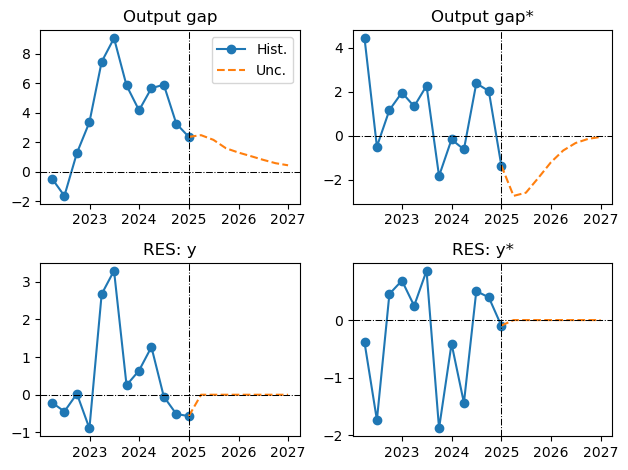

In [10]:
DBdict = {'Unc.': FDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(DBdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

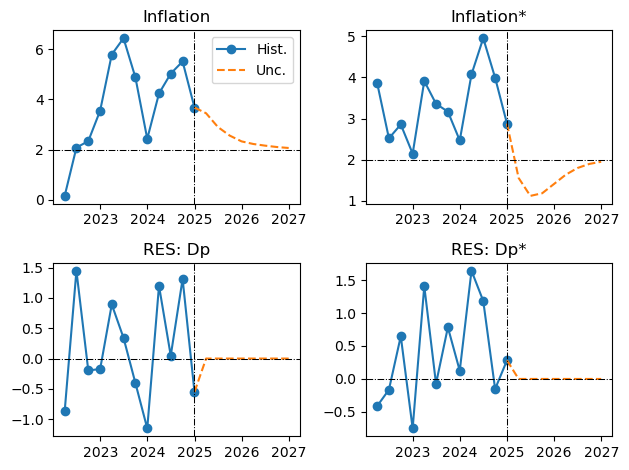

In [11]:
lista = ['Dp','Dps','res_Dp','res_Dps']
listanames = ['Inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [100*np.log(1+2.0/100),100*np.log(1+2.0/100),0,0]
fig, axs = HTS.plotTSforecast(DBdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

2. Not anticipated conditional forecast

In [12]:
FH = 8
UCond = HTS.ReadForeCond('Supuestos_OnlyU.xlsx','2025Q1', FH)

In [13]:
print('Which are the assumptions?')
print('Unanticipated Softtunning')
print(UCond['UShock'])
print('Unanticipated Hardtunning')
print(UCond['Uvar']['var'])
print('-> Shocks to achieve hardtunning:')
print(UCond['Uvar']['shock'])

Which are the assumptions?
Unanticipated Softtunning
            res_Dps  res_ys
2025-03-31     -0.1     NaN
2025-06-30      NaN     NaN
2025-09-30      0.1    -1.2
2025-12-31      NaN    -0.6
2026-03-31      NaN     NaN
2026-06-30      NaN     NaN
2026-09-30      NaN     NaN
2026-12-31      NaN     NaN
Unanticipated Hardtunning
             Dp     y
2025-03-31  NaN   NaN
2025-06-30  NaN   NaN
2025-09-30  NaN   NaN
2025-12-31  NaN   NaN
2026-03-31  2.1   NaN
2026-06-30  2.0  1.50
2026-09-30  NaN  0.75
2026-12-31  NaN   NaN
-> Shocks to achieve hardtunning:
['res_Dp', 'res_y']


In [14]:
UFDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1',UCond)

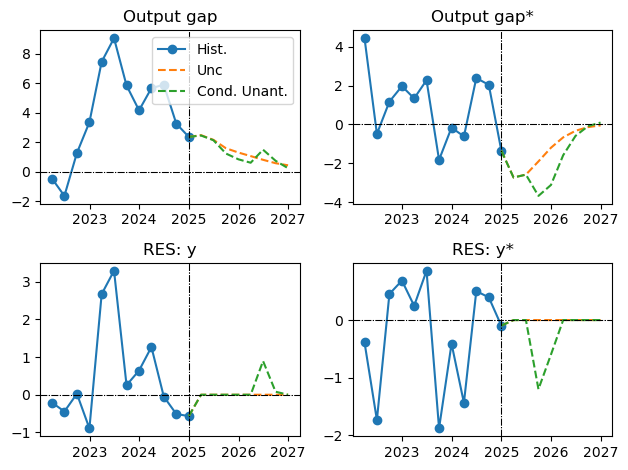

In [15]:
BDdict = {'Unc': FDB,'Cond. Unant.': UFDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

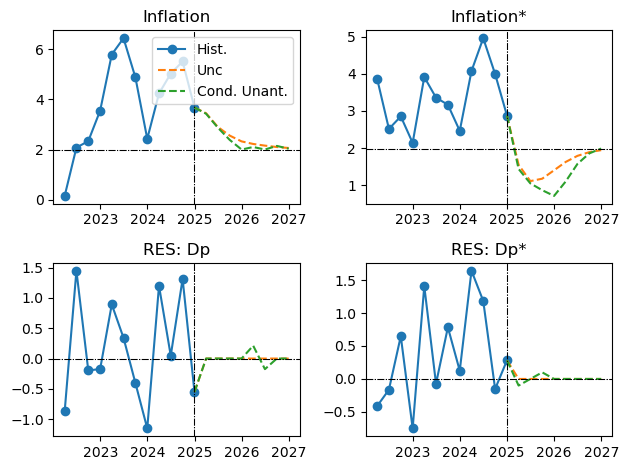

In [16]:
lista = ['Dp','Dps','res_Dp','res_Dps']
listanames = ['Inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [100*np.log(1+2.0/100),100*np.log(1+2.0/100),0,0]
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

In [17]:
UFDB['Dp_uh'] = UCond['Uvar']['var']['Dp']
UFDB[['Dp','Dp_uh']].tail(10)

,Dp,Dp_uh
2024-09-30,5.517448,NaN
2024-12-31,3.677557,NaN
2025-03-31,3.429162,NaN
2025-06-30,2.873091,NaN
2025-09-30,2.384590,NaN
2025-12-31,1.998593,NaN
2026-03-31,2.100000,2.1
2026-06-30,2.000000,2.0
2026-09-30,2.144046,NaN
2026-12-31,2.032999,NaN


3. Anticipated shocks

In [18]:
ACond = HTS.ReadForeCond('Supuestos_OnlyA.xlsx','2025Q1', FH)

In [19]:
print('Which are the assumptions?')
print('Unanticipated Softtunning')
print(ACond['AShock'])
print('Unanticipated Hardtunning')
print(ACond['Avar']['var'])
print('-> Shocks to achieve hardtunning:')
print(ACond['Avar']['shock'])

Which are the assumptions?
Unanticipated Softtunning
            res_Dps  res_ys
2025-03-31     -0.1     NaN
2025-06-30      NaN     NaN
2025-09-30      0.1    -1.2
2025-12-31      NaN    -0.6
2026-03-31      NaN     NaN
2026-06-30      NaN     NaN
2026-09-30      NaN     NaN
2026-12-31      NaN     NaN
Unanticipated Hardtunning
             Dp     y
2025-03-31  NaN   NaN
2025-06-30  NaN   NaN
2025-09-30  NaN   NaN
2025-12-31  NaN   NaN
2026-03-31  2.1   NaN
2026-06-30  2.0  1.50
2026-09-30  NaN  0.75
2026-12-31  NaN   NaN
-> Shocks to achieve hardtunning:
['res_Dp', 'res_y']


In [20]:
AFDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1',ACond)

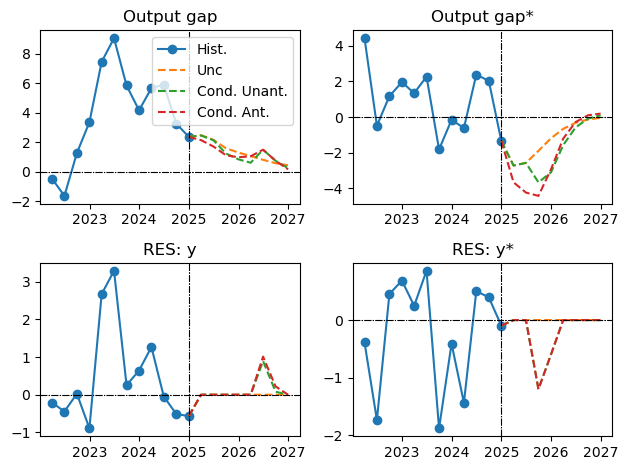

In [21]:
BDdict = {'Unc': FDB,'Cond. Unant.': UFDB,'Cond. Ant.': AFDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

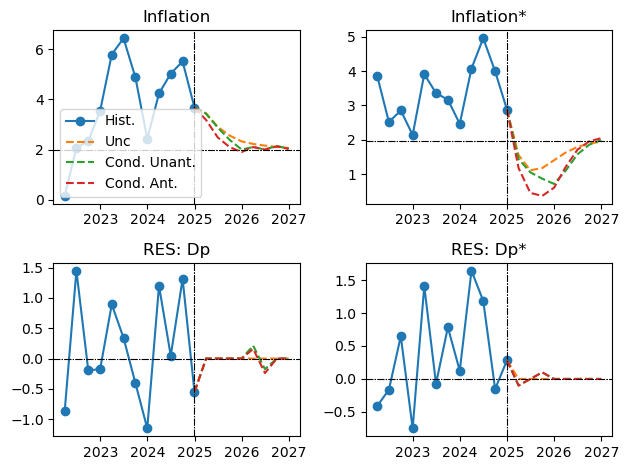

In [22]:
lista = ['Dp','Dps','res_Dp','res_Dps']
listanames = ['Inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [100*np.log(1+2.0/100),100*np.log(1+2.0/100),0,0]
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

In [23]:
AFDB['Dp_uh'] = ACond['Avar']['var']['Dp']
AFDB[['Dp','Dp_uh']].tail(10)

,Dp,Dp_uh
2024-09-30,5.517448,NaN
2024-12-31,3.677557,NaN
2025-03-31,3.179213,NaN
2025-06-30,2.478276,NaN
2025-09-30,2.095114,NaN
2025-12-31,1.898100,NaN
2026-03-31,2.100000,2.1
2026-06-30,2.000000,2.0
2026-09-30,2.125014,NaN
2026-12-31,2.024667,NaN


4. Anticipated and ununticipated shocks

In [24]:
Cond = HTS.ReadForeCond('Supuestos_MixedUA.xlsx','2025Q1', FH)
print('Which are the assumptions?')
print('Unanticipated Softtunning')
print(Cond['UShock'])
print('Anticipated Softtunning')
print(Cond['AShock'])
print('Unanticipated Hardtunning')
print(Cond['Uvar']['var'])
print('-> Shocks to achieve hardtunning:')
print(Cond['Uvar']['shock'])
print('Anticipated Hardtunning')
print(Cond['Avar']['var'])
print('-> Shocks to achieve hardtunning:')
print(Cond['Avar']['shock'])

Which are the assumptions?
Unanticipated Softtunning
            res_ys
2025-03-31     NaN
2025-06-30     NaN
2025-09-30    -1.2
2025-12-31    -0.6
2026-03-31     NaN
2026-06-30     NaN
2026-09-30     NaN
2026-12-31     NaN
Anticipated Softtunning
            res_Dps
2025-03-31     -0.1
2025-06-30      NaN
2025-09-30      0.1
2025-12-31      NaN
2026-03-31      NaN
2026-06-30      NaN
2026-09-30      NaN
2026-12-31      NaN
Unanticipated Hardtunning
             Dp
2025-03-31  NaN
2025-06-30  NaN
2025-09-30  NaN
2025-12-31  NaN
2026-03-31  2.1
2026-06-30  2.0
2026-09-30  NaN
2026-12-31  NaN
-> Shocks to achieve hardtunning:
['res_Dp']
Anticipated Hardtunning
               y
2025-03-31   NaN
2025-06-30   NaN
2025-09-30   NaN
2025-12-31   NaN
2026-03-31   NaN
2026-06-30  1.50
2026-09-30  0.75
2026-12-31   NaN
-> Shocks to achieve hardtunning:
['res_y']


In [25]:
AUFDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1',Cond)

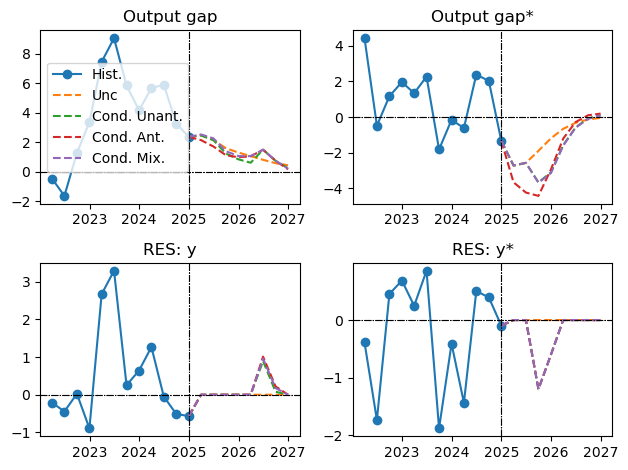

In [26]:
BDdict = {'Unc': FDB,'Cond. Unant.': UFDB,'Cond. Ant.': AFDB,'Cond. Mix.': AUFDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

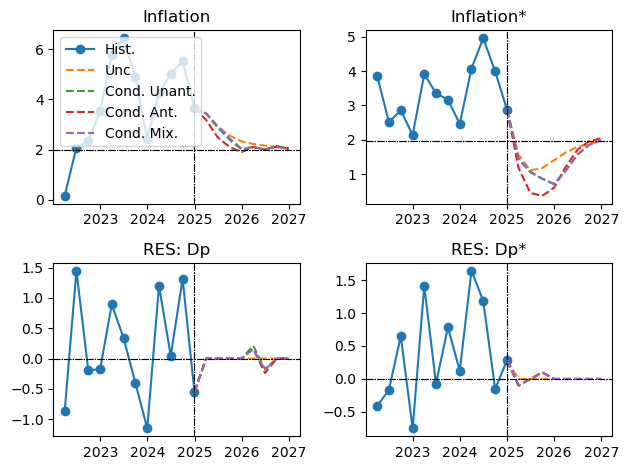

In [27]:
lista = ['Dp','Dps','res_Dp','res_Dps']
listanames = ['Inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [100*np.log(1+2.0/100),100*np.log(1+2.0/100),0,0]
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)